<a href="https://colab.research.google.com/github/harsha1067/ASSIGNMENTS/blob/main/Assignment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report 


In [2]:
df = pd.read_csv('glass.csv')
df.head(11)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [3]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df[df.duplicated()].shape

(1, 10)

In [7]:
df = df.drop_duplicates()
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
corr = df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

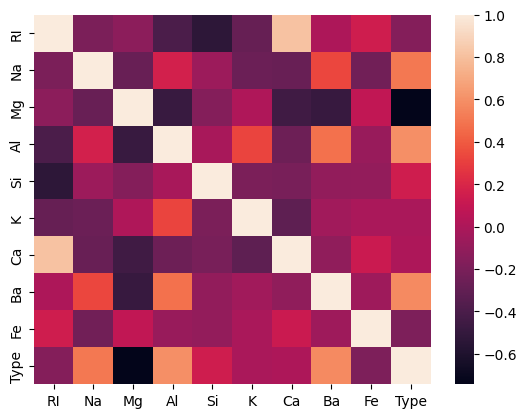

In [9]:
sns.heatmap(corr)

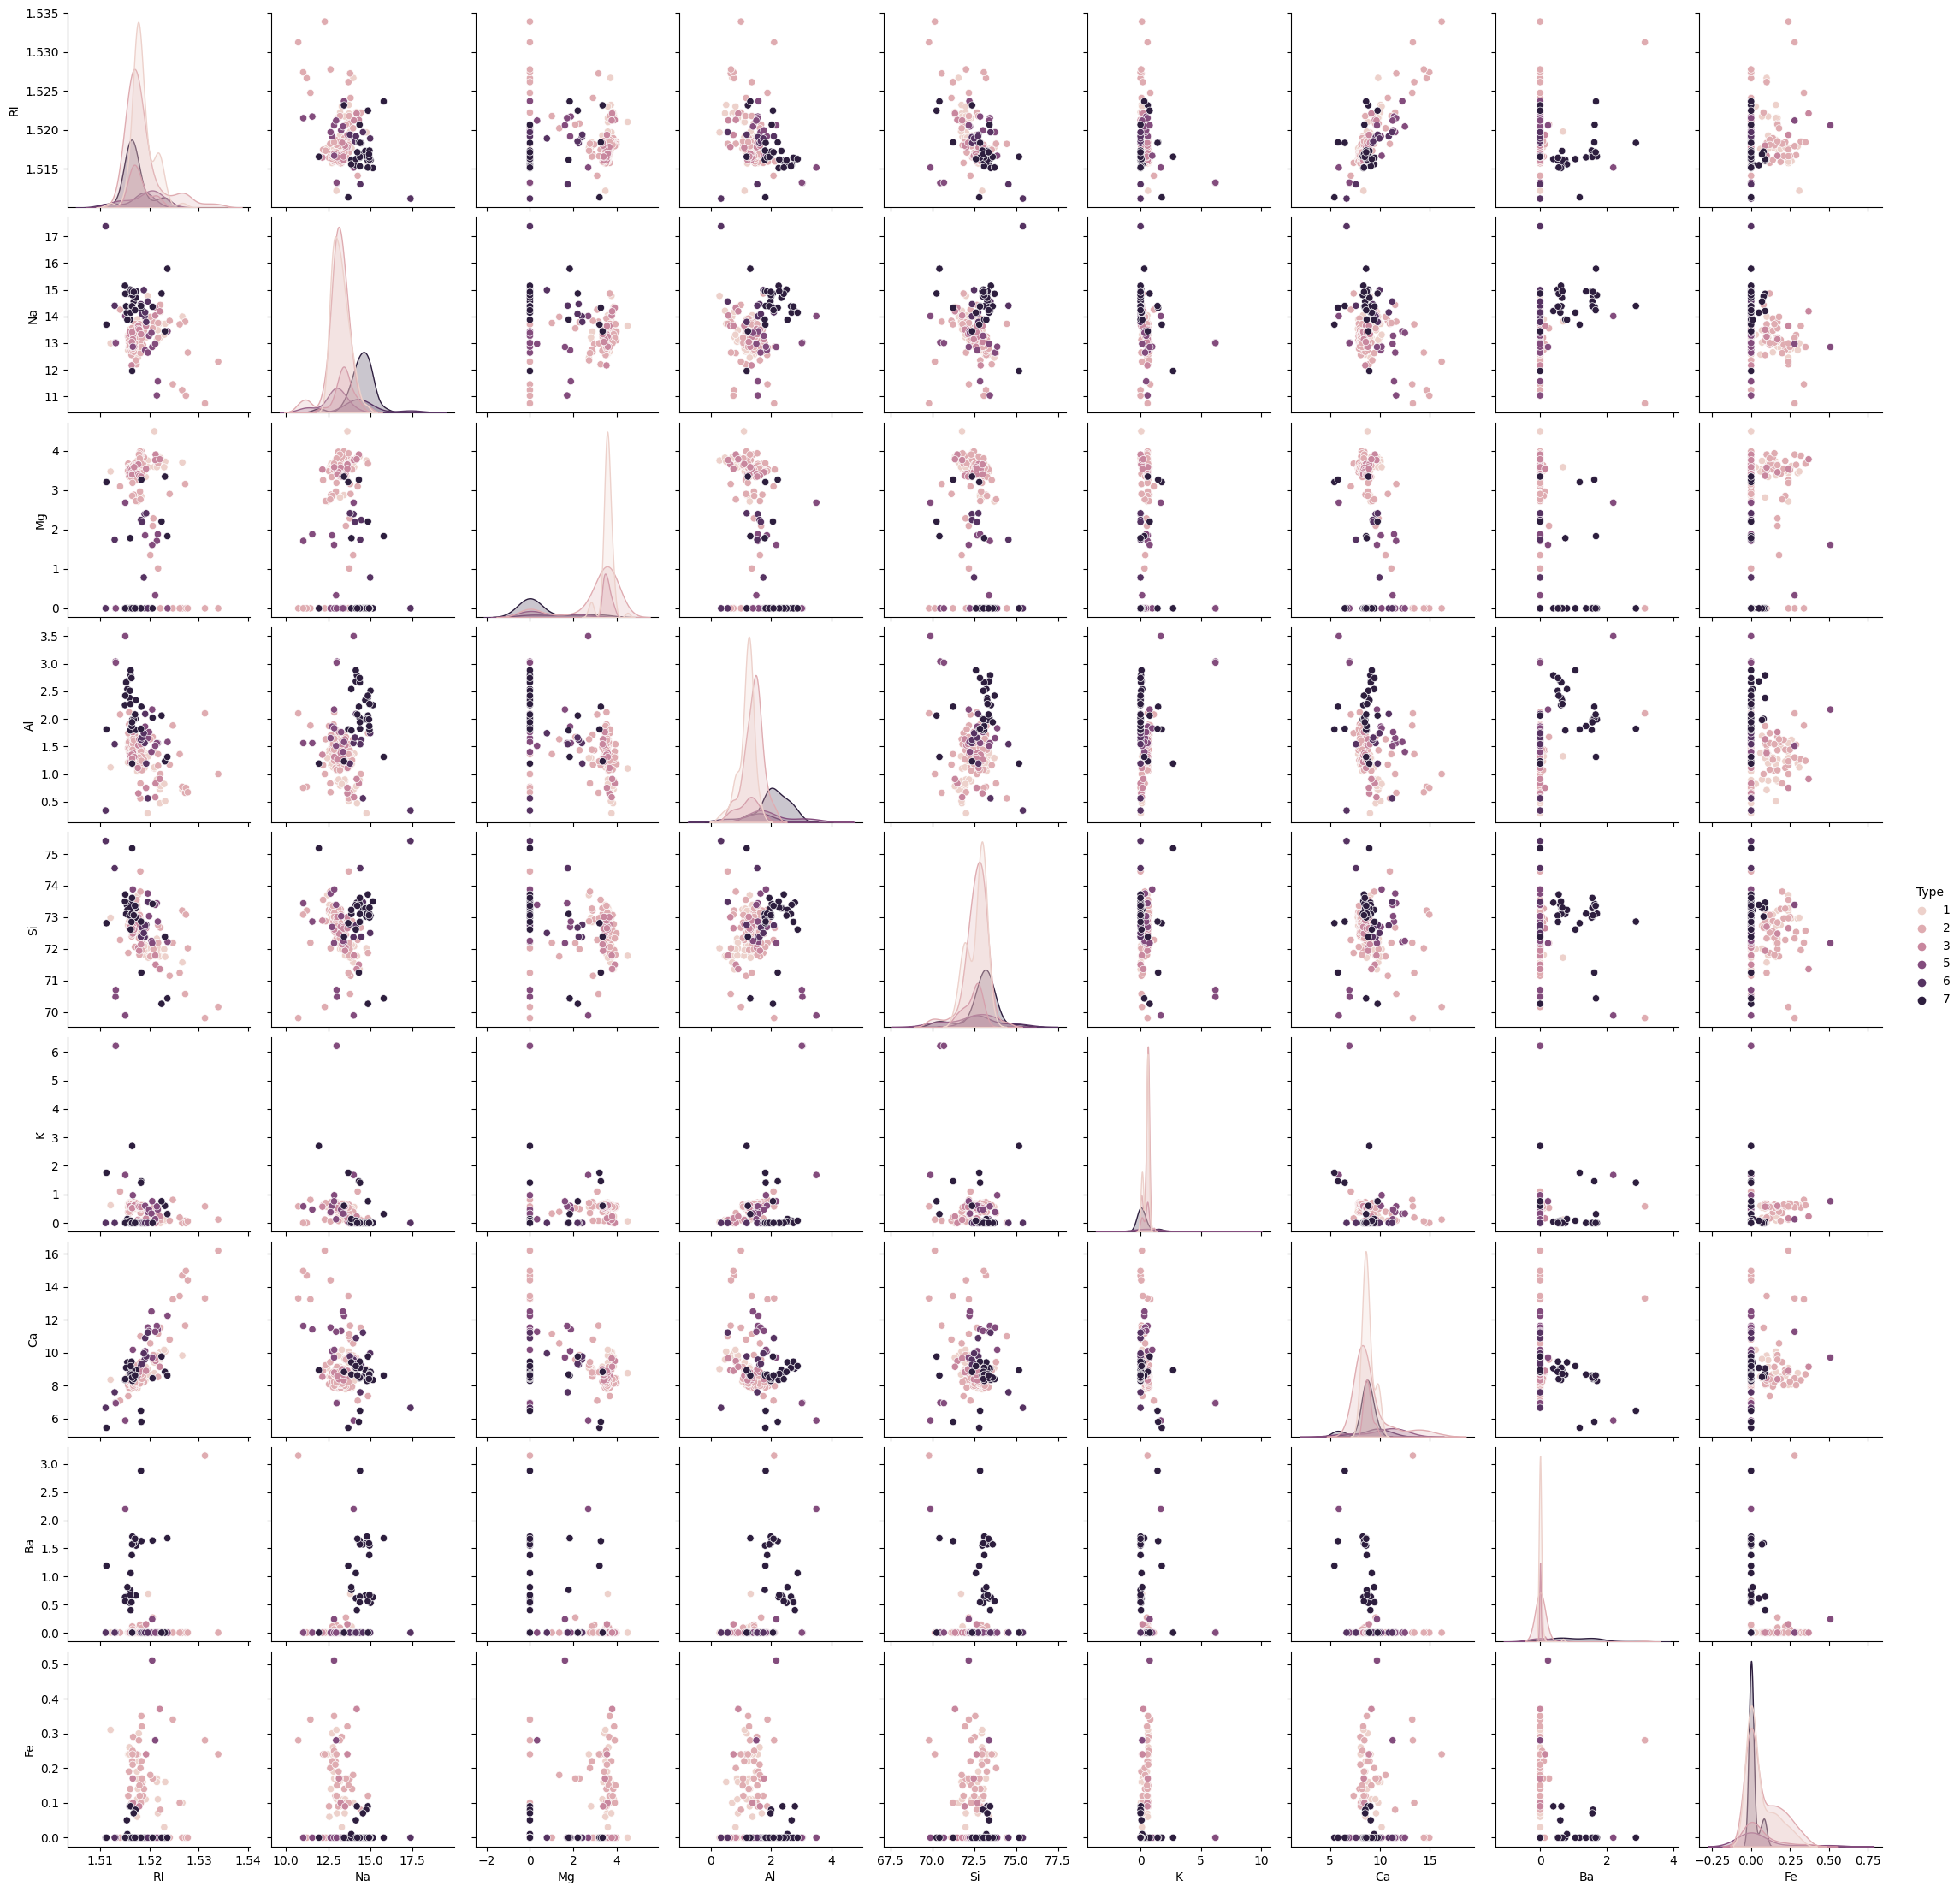

In [10]:
sns.pairplot(df, hue = 'Type')
plt.show()

In [11]:
df1 = df.iloc[:, 0:10]
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [12]:
ar = df1.values 
ar

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [13]:
from sklearn.preprocessing import StandardScaler 
std_scaler = StandardScaler().fit(ar)
S = std_scaler.transform(ar)
S

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.35380764,
        -0.58830108, -0.85170346],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.35380764,
        -0.58830108, -0.85170346],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.35380764,
        -0.58830108, -0.85170346],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ...,  2.94550057,
        -0.58830108,  2.0051916 ],
       [-0.60735132,  1.19781989, -1.86017161, ...,  2.80467644,
        -0.58830108,  2.0051916 ],
       [-0.40905912,  1.01371278, -1.86017161, ...,  3.00585377,
        -0.58830108,  2.0051916 ]])

In [14]:
df_knn  = pd.DataFrame(S, columns = df.columns[:])
df_knn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,-0.851703
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,-0.851703
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,-0.851703
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,-0.851703
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,-0.851703
...,...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,2.005192
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,2.005192
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,2.005192
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,2.005192


In [15]:
x = df_knn
y = df['Type']
print(x)
print(y)

           RI        Na        Mg        Al        Si         K        Ca  \
0    0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1   -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2   -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3   -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4   -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.699888  0.903249 -1.860172  2.891336 -0.058368 -0.642789  0.158812   
209 -0.494986  1.860605 -1.860172  1.092483  0.524398 -0.765554 -0.389506   
210  0.760865  1.173272 -1.860172  1.153118  0.990612 -0.765554 -0.361387   
211 -0.607351  1.197820 -1.860172  0.991424  1.236668 -0.765554 -0.333268   
212 -0.409059  1.013713 -1.860172  1.274389  0.912909 -0.765554 -0.234852   

           Ba        Fe      Type  
0   -0.353808 -0.588301 -0.851703  
1  

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
185,0.010659,1.124177,0.403249,1.557355,-1.819617,1.474913,-2.224265,2.925383,-0.588301,2.005192
202,-0.584217,1.713320,-1.860172,1.092483,0.589150,-0.765554,-0.473863,3.086325,-0.588301,2.005192
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,2.005192
72,-0.673449,-0.078656,0.618482,0.243586,0.278342,0.170531,-0.748022,-0.353808,-0.588301,-0.375554
58,-0.266950,-0.017287,0.680969,-0.524464,0.174739,0.109149,-0.480893,-0.353808,0.541526,-0.851703
...,...,...,...,...,...,...,...,...,...,...
32,-0.197547,-0.680073,0.555995,-0.443617,0.407845,0.170531,-0.277031,-0.172748,1.671354,-0.851703
124,0.123025,-0.581882,0.680969,0.223374,-0.187871,0.124494,-0.284060,-0.353808,0.644238,-0.375554
131,-0.071962,0.031808,0.903145,-0.544676,-0.213772,0.124494,-0.565249,-0.353808,-0.588301,-0.375554
158,-0.128145,0.117725,0.472679,0.364857,-0.926042,0.109149,-0.101287,-0.353808,0.336103,0.100595


In [17]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
83,-1.407130,1.038260,0.285217,1.274389,-0.485730,0.922469,-1.317430,-0.353808,-0.588301,-0.375554
62,1.296254,0.940070,0.785114,-1.353149,-1.690113,-0.765554,0.517328,-0.353808,-0.588301,-0.851703
84,-0.693278,-0.054108,0.625425,0.081891,0.084086,-0.074999,-0.523071,-0.353808,-0.588301,-0.375554
137,-0.531339,-0.753716,0.583767,0.182950,0.912909,0.247260,-0.740993,-0.353808,-0.588301,-0.375554
187,1.362351,1.786963,-0.332710,1.233966,-3.101703,0.400716,0.566537,-0.353808,-0.588301,2.005192
...,...,...,...,...,...,...,...,...,...,...
115,-0.019084,-0.201394,0.847601,-0.079804,-0.420978,0.078457,-0.452774,-0.353808,0.438815,-0.375554
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,-0.851703
28,-0.220682,-1.036013,0.583767,-0.039380,0.640952,0.109149,-0.291090,-0.353808,-0.588301,-0.851703
113,0.040403,-0.373227,0.896202,-0.524464,-0.278524,0.155186,-0.368417,-0.353808,-0.588301,-0.375554


In [18]:
y_train

186    7
203    7
211    7
73     2
59     1
      ..
32     1
125    2
132    2
159    3
204    7
Name: Type, Length: 149, dtype: int64

In [19]:
y_test

84     2
63     1
85     2
138    2
188    7
      ..
116    2
4      1
28     1
114    2
126    2
Name: Type, Length: 64, dtype: int64

In [20]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
pred = model.predict(x_test) 
pd.Series(pred).value_counts()

2    27
1    24
7     7
3     3
5     2
6     1
dtype: int64

In [22]:
pd.crosstab(y_test, pred)

col_0,1,2,3,5,6,7
Type,,,,,,
1,17,2,0,0,0,0
2,5,21,1,1,0,0
3,2,4,2,0,0,0
7,0,0,0,1,1,7


In [23]:
Accuracy = accuracy_score(y_test, pred) * 100
Accuracy

73.4375

In [24]:
model.score(x_train, y_train)

0.9395973154362416

In [25]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79        19
           2       0.78      0.75      0.76        28
           3       0.67      0.25      0.36         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.73        64
   macro avg       0.53      0.45      0.47        64
weighted avg       0.77      0.73      0.74        64



In [26]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors = n_neighbors)

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [28]:
print(grid.best_score_)
print(grid.best_params_) 

0.7981173864894794
{'n_neighbors': 1}


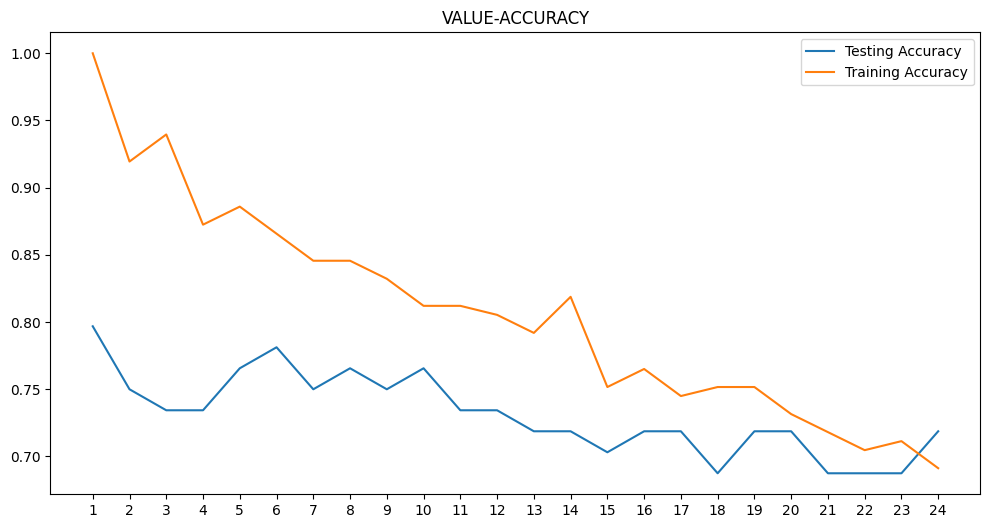

Accuracy is 0.796875 with k = 1


In [29]:
k_values = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(k_values):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  train_accuracy.append(knn.score(x_train, y_train))
  test_accuracy.append(knn.score(x_test, y_test))
plt.figure(figsize = [12, 6])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title("VALUE-ACCURACY")
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Accuracy is {} with k = {}". format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

Implement a KNN model to classify the animals in to categorie


In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score 

In [31]:
zoo = pd.read_csv('Zoo.csv')
zoo.head(11)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [32]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [34]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [35]:
dup = zoo['animal name'].value_counts()
dup[dup > 0]

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [36]:
pony = zoo[zoo['animal name']  == 'pony']
pony

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
65,pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [37]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [38]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [39]:
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow") for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

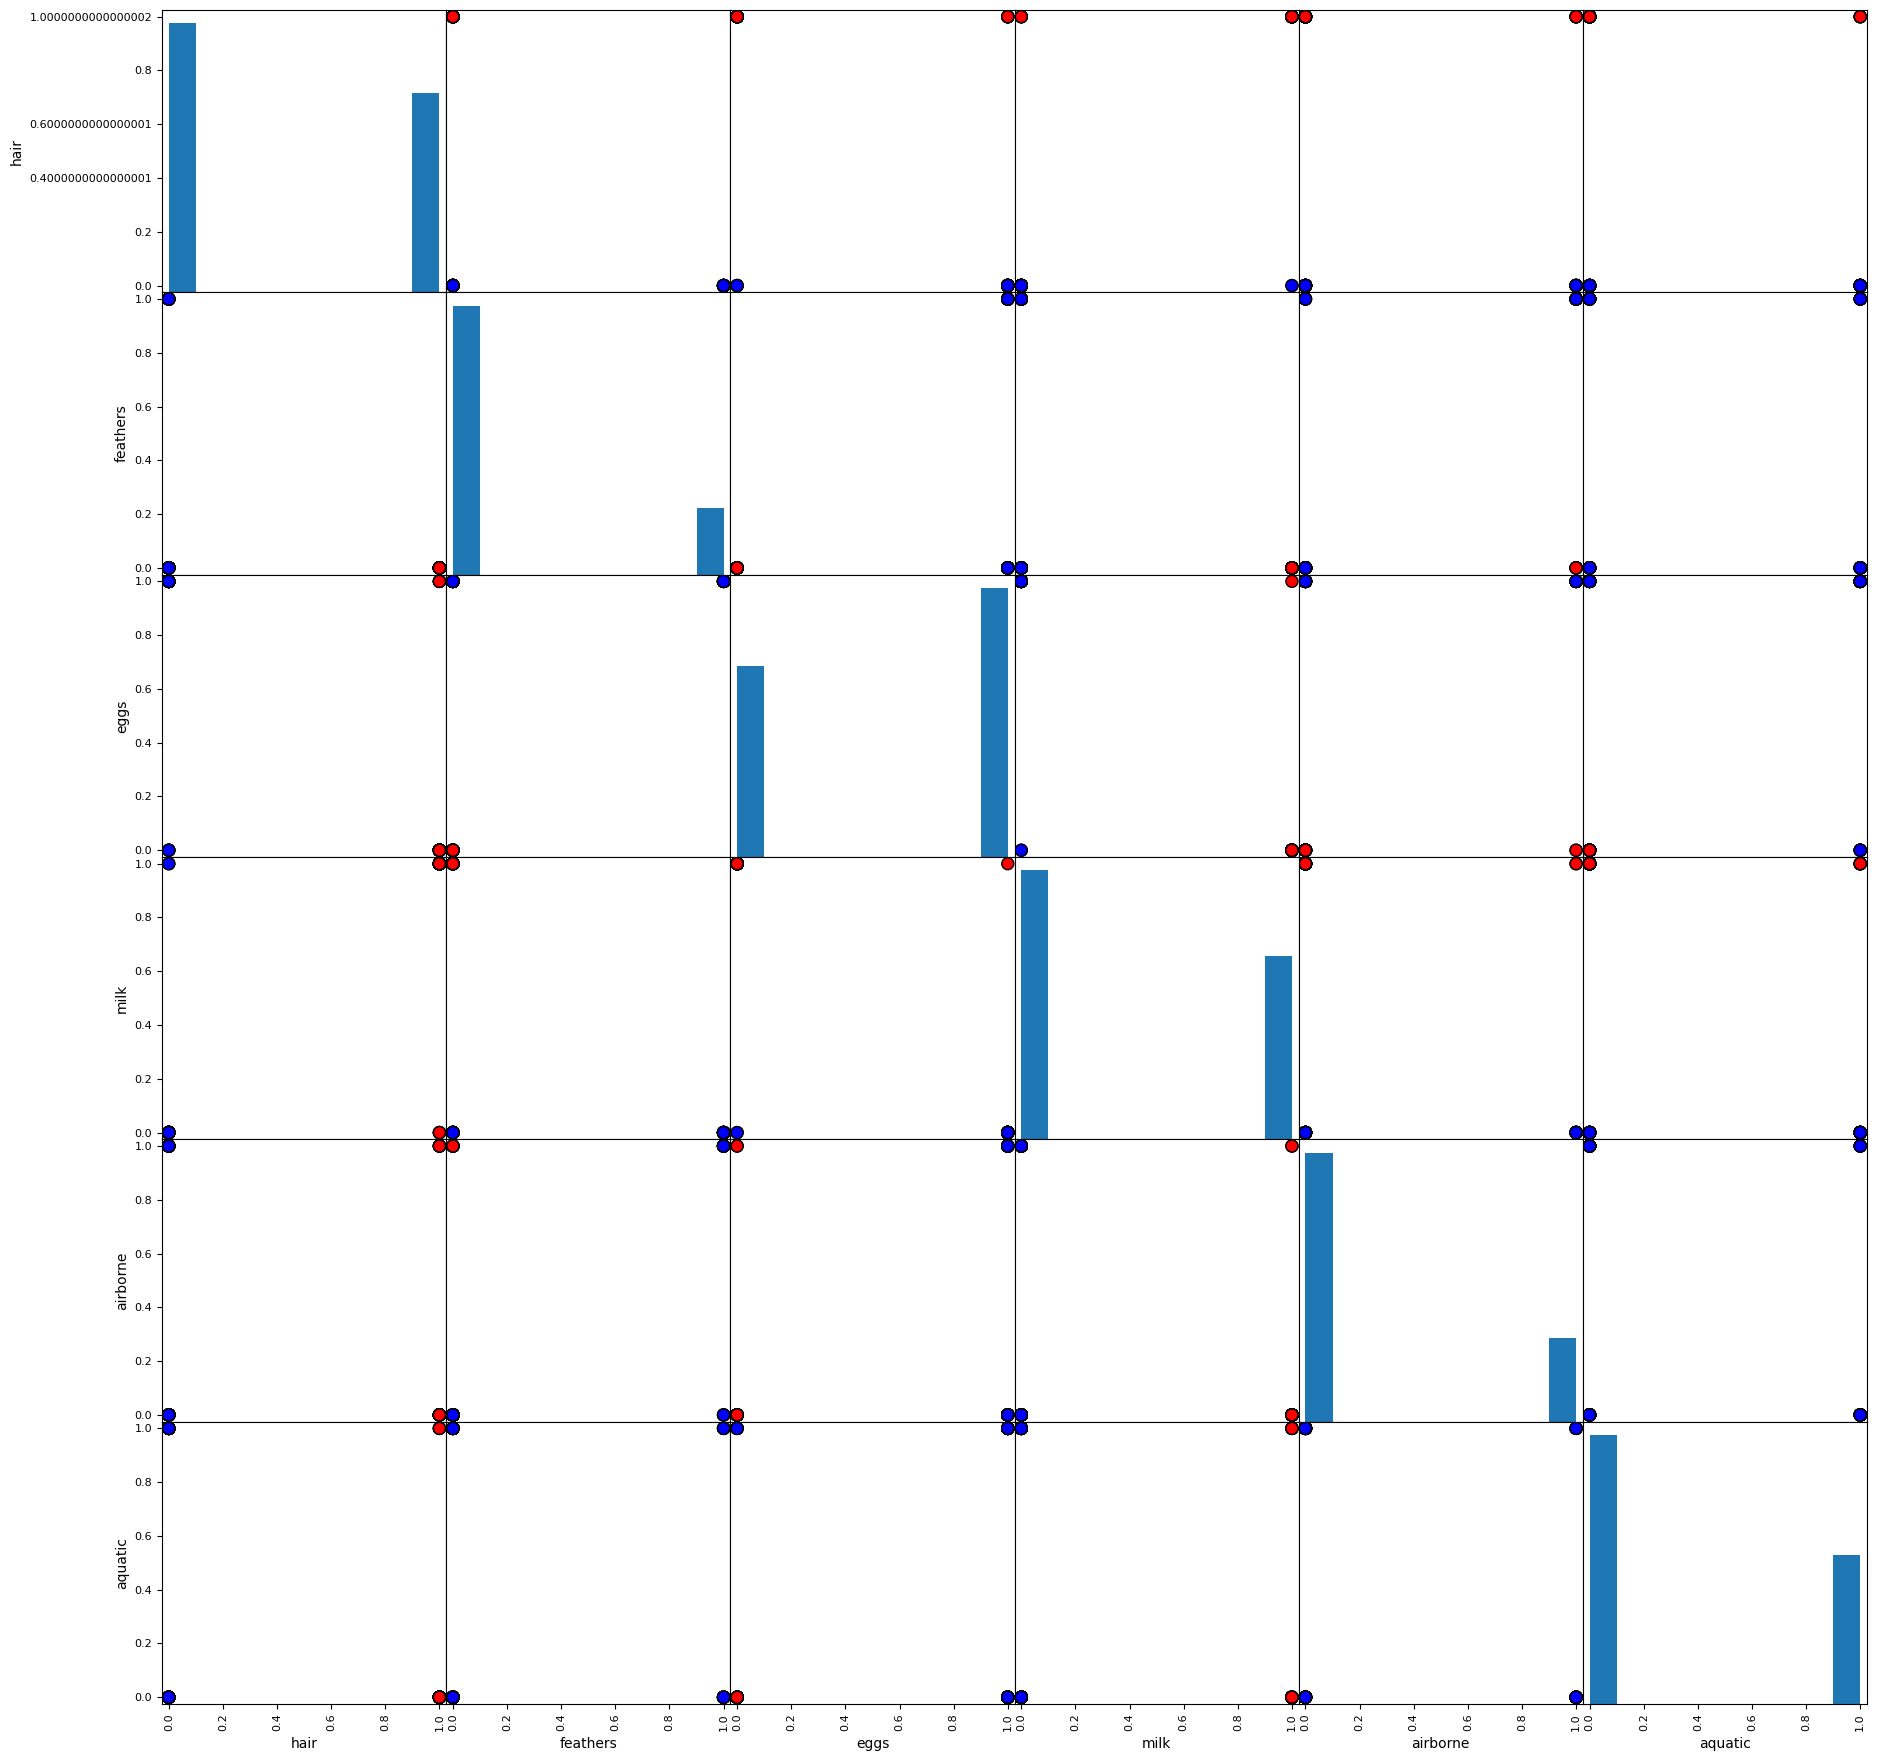

In [40]:
pd.plotting.scatter_matrix(zoo.iloc[:, :7],
                           c = color_list,
                           figsize = [22,22],
                           diagonal = 'hist',
                           alpha = 1,
                           s = 300,
                           marker = '.',
                           edgecolor = "black")
plt.show()

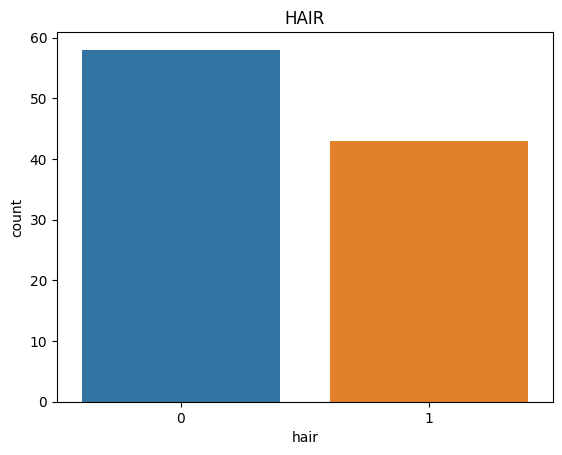

0    58
1    43
Name: hair, dtype: int64

In [41]:
sns.countplot(x = 'hair', data = zoo)
plt.title("HAIR")
plt.show()
zoo.loc[:, 'hair'].value_counts()

[]

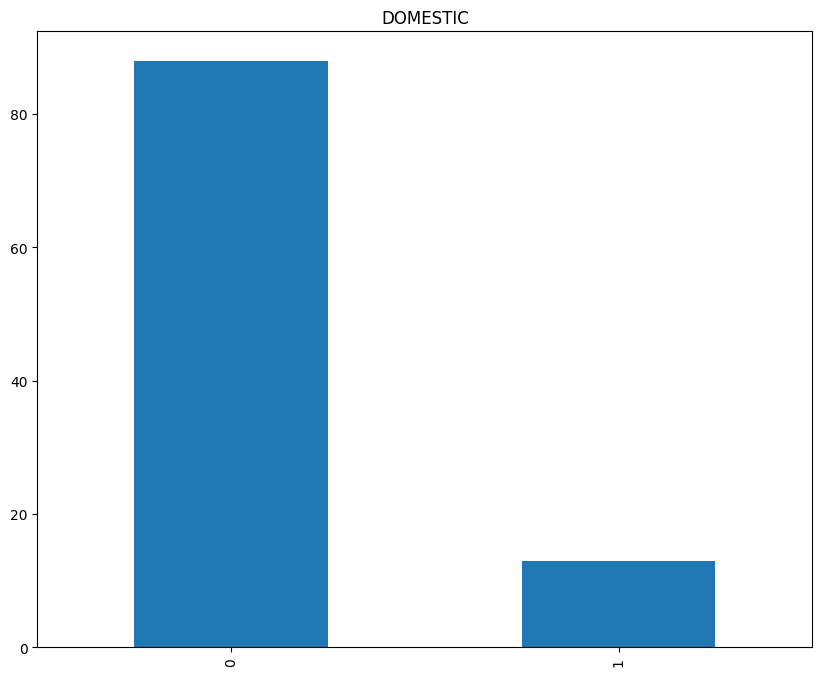

In [42]:
plt.figure(figsize = (10, 8));
zoo['domestic'].value_counts().plot(kind = "bar");
plt.title("DOMESTIC")
plt.plot()

In [43]:
pd.crosstab(zoo['type'], zoo['domestic']) 

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


<Axes: title={'center': 'DOMESTIC AND NON DOMESTIC'}, xlabel='type'>

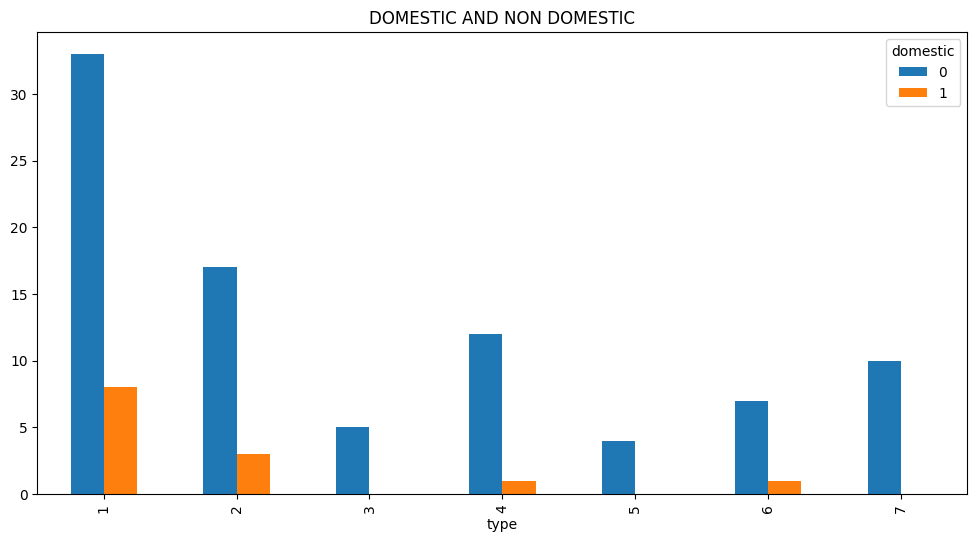

In [44]:
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind = "bar", figsize = (12, 6),
                                               title = "DOMESTIC AND NON DOMESTIC")

In [45]:
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [46]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


<Axes: title={'center': 'MILK PROVIDING ANIMALS'}, xlabel='type'>

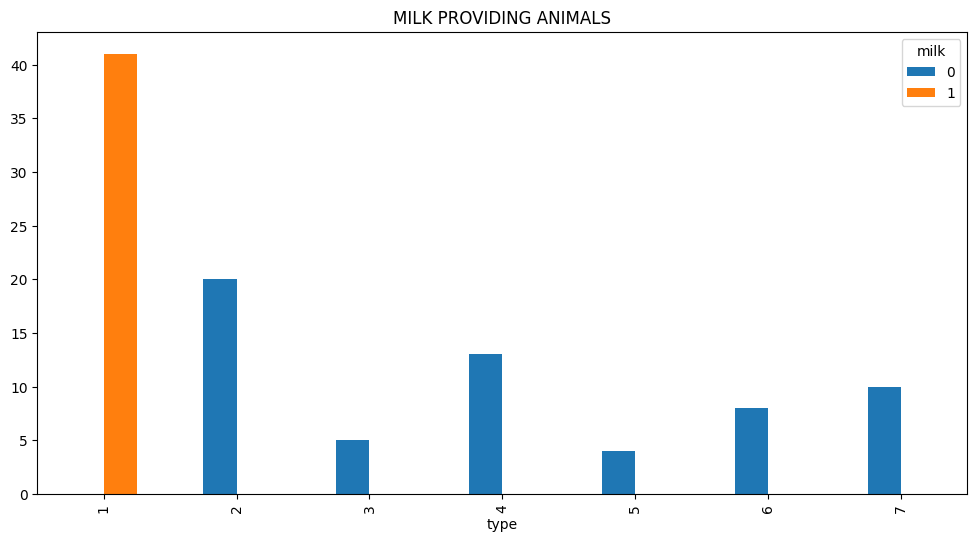

In [54]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind = 'bar',
                                           figsize = (12, 6),
                                           title = "MILK PROVIDING ANIMALS")

In [48]:
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [49]:
zoo[zoo['aquatic'] == 1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

<Axes: title={'center': 'AQUATIC'}, xlabel='type'>

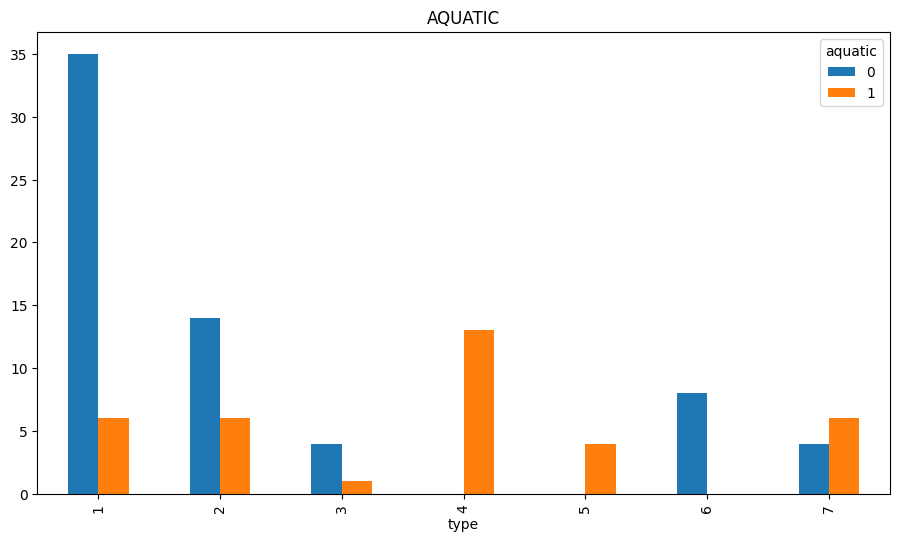

In [50]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind = 'bar',
                                              figsize = (11, 6),
                                              title = "AQUATIC")

In [57]:
type_list = [i for i in zoo.type] 
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

In [59]:
from sklearn.model_selection import train_test_split
x = zoo.iloc[:, 1:16]
y = zoo.iloc[:, 16]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2, stratify = y)

In [60]:
x_train.head(11)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0
24,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0
23,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
74,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0


In [63]:
y_train

16    0
24    0
23    1
85    0
73    0
     ..
30    0
13    0
43    0
62    0
4     1
Name: catsize, Length: 80, dtype: int64

In [62]:
x_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
63,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0


In [64]:
y_test

63     1
52     0
82     0
18     1
98     1
38     0
22     1
95     1
14     0
27     0
77     0
100    0
59     0
34     0
28     1
71     1
69     1
80     0
15     0
21     0
48     1
Name: catsize, dtype: int64

In [65]:
num_folds = 11
kfold = KFold(n_splits = 11)

In [66]:
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [67]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

0    14
1     7
dtype: int64

In [76]:
pd.crosstab(y_test, pred)

col_0,0,1
catsize,,
0,11,1
1,3,6


In [77]:
np.mean(pred == y_test)

0.8095238095238095

In [78]:
model.score(x_train, y_train)

0.8

In [79]:
accuracy_score(y_test, pred) * 100

80.95238095238095

In [80]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.86      0.67      0.75         9

    accuracy                           0.81        21
   macro avg       0.82      0.79      0.80        21
weighted avg       0.82      0.81      0.80        21



In [81]:
n_neighbors = np.array(range(0, 22))
param_grid = dict(n_neighbors = n_neighbors)

In [82]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])})

In [83]:
print(grid.best_score_)
print(grid.best_params_)

0.800952380952381
{'n_neighbors': 7}


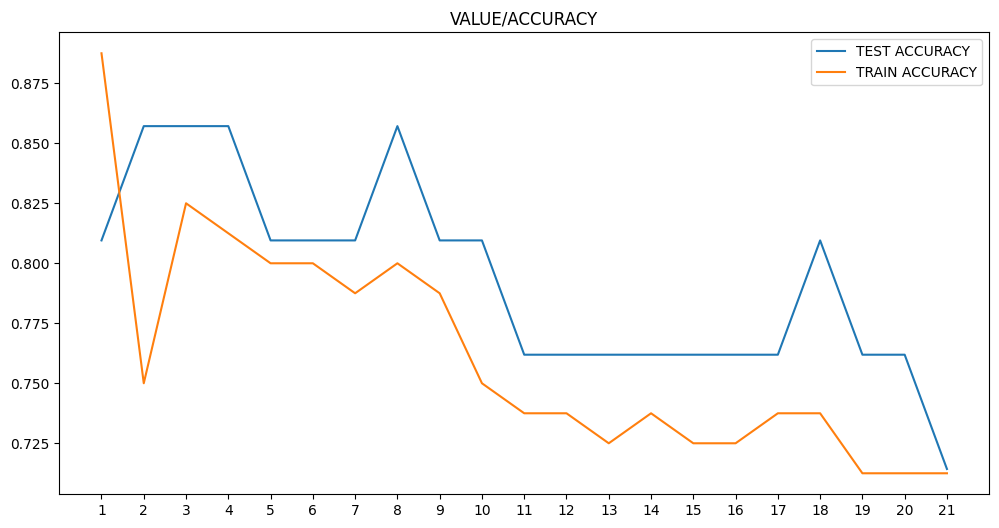

Best accuracy is 0.8571428571428571 with k = 2


In [86]:
k_values = np.arange(1,22)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(k_values):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train) 
  train_accuracy.append(knn.score(x_train, y_train))
  test_accuracy.append(knn.score(x_test, y_test)) 
plt.figure(figsize = (12, 6))
plt.plot(k_values, test_accuracy, label = "TEST ACCURACY")
plt.plot(k_values, train_accuracy, label = "TRAIN ACCURACY")
plt.legend()
plt.title('VALUE/ACCURACY')
plt.xticks(k_values) 
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with k = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))